<a href="https://colab.research.google.com/github/Abhi311509/Texas-Salary-Prediction/blob/main/Texas_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Texas Salary Prediction

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Business Case** : To predict a salary of employees based on the given features.

In [8]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
# loading the data
data=pd.read_csv("/content/drive/MyDrive/Internships/salary/salary.csv")

In [10]:
data.head()

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

   ... HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  duplicated  \
0  ...  75.96150        29.0  9545.82  114549.84        127717        True   
1  ...  81.04454         4.0  1404.77   16857.24        127717        True   
2  ...  75.96150        29.0  9545.82  114549.84         59115        True   
3  ...  81.04453         4.0  1404.77   16857.24         59115        True   
4  ...   0.00000        40.0  3284.27   39411.24        165030        True   

  multiple_full_time_jobs  combined_multiple_jobs summed_annual_salary  \
0                     NaN                     NaN            131407.08   
1                     NaN                     NaN                  NaN   
2                     NaN                     NaN            131407.08   
3                     NaN                     NaN                  NaN   
4                     1.0                     NaN                  NaN   

   hide_from_search  
0               NaN  
1              True  
2               NaN  
3              True  
4               NaN  

[5 rows x 21 columns]

In [11]:
data.tail()

AGENCY                                        AGENCY NAME  \
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...     12.93        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149480  CRP - CLASSIFIED REGULAR PART-TIME        ...     11.74        20.0   

        MONTHLY    ANNUAL  STATE NUMBER  duplicated multiple_full_time_jobs  \
149476  2899.00  34788.00        770781         NaN                     NaN   
149477  5500.00  66000.00        847431         NaN                     NaN   
149478  1120.60  13447.20         34266         NaN                     NaN   
149479  5744.16  68929.92        123490         NaN                     NaN   
149480  1017.46  12209.52        103583         NaN                     NaN   

        combined_multiple_jobs summed_annual_salary  hide_from_search  
149476                     NaN                  NaN               NaN  
149477                     NaN                  NaN               NaN  
149478                     NaN                  NaN               NaN  
149479                     NaN                  NaN               NaN  
149480                     NaN                  NaN               NaN  

[5 rows x 21 columns]

In [12]:
pd.set_option("display.max_columns",None)
data

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY DATE  HRLY RATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   
...                                          ...         ...        ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17    0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15    0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89    0.00000   
149480  CRP - CLASSIFIED REGULAR PA

## Domain Analysis

1.**AGENCY** : A business or organization providing a particular service on behalf of another business, person, or group.

2.**AGENCY NAME** : A person or thing through which power is used or something is achieved

3.**LAST NAME** : It is the last name of the individual record.

4.**FIRST NAME** : It is the first name of the individual record.

5.**MI** : Middle initial.

6.**CLASS CODE** : These codes must be established before employees can be added to the system and payrolls processed.

7.**CLASS TITLE** :  The official title used for all personnel and payroll processes.

8.**ETHNICITY** : The quality or fact of belonging to a population group or subgroup made up of people who share a common cultural background or descent.

9.**GENDER** :  Is the range of characteristics pertaining to femininity and masculinity and differentiating between them.

10.**STATUS** :  Position or rank in relation to others.

11.**EMPLOYEE DATE** : Date of joining of an individual.

12.**HRLY RATE** : The amount of money that is charged, paid, or earned for every hour worked.

13.**HRS PER WEEK** :  The number of hours in a week that the employee normally would work for the shared work employer or 40 hours.

14.**MONTHLY** : A salary is the money that someone is paid each month by their employer.

15.**ANNUAL** : An annual salary is the total amount of money you earn from a job in a year.

16.**STATE NUMBER** : A unique number assigned to a business or organization by the state where the business operates, and is used for filing taxes and hiring employees.

17.**DUPLICATED** : One of two or more identical things.

18.**MUTIPLE FULL TIME JOBS** : Individuals works on one or more jobs in full time.

19.**COMBINED MULTIPLE JOBS** : The Combine Jobs feature allows you to merge two or more jobs from the same market view into a single job.

20.**SUMMED ANNUAL SALARY** : Total salary earned by an individual in a year including mutiple full time jobs and combined multiple jobs.

21.**HIDE FROM SEARCH** : Gives you the option for your web searches to be hidden with respect to organisation.




## Basic Checks

In [13]:
data.shape

(149481, 21)

In [14]:
data.head()

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  \
0    02/18/88   75.96150        29.0  9545.82  114549.84        127717   
1    02/01/15   81.04454         4.0  1404.77   16857.24        127717   
2    02/01/20   75.96150        29.0  9545.82  114549.84         59115   
3    09/01/18   81.04453         4.0  1404.77   16857.24         59115   
4    06/29/20    0.00000        40.0  3284.27   39411.24        165030   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   
1       True                      NaN                    NaN   
2       True                      NaN                    NaN   
3       True                      NaN                    NaN   
4       True                      1.0                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN  
1                   NaN             True  
2             131407.08              NaN  
3                   NaN             True  
4                   NaN              NaN

In [15]:
data.tail()

AGENCY                                        AGENCY NAME  \
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY DATE  HRLY RATE  \
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17       0.00   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15       0.00   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12      12.93   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89       0.00   
149480  CRP - CLASSIFIED REGULAR PART-TIME          02/16/12      11.74   

        HRS PER WK  MONTHLY    ANNUAL  STATE NUMBER duplicated  \
149476        40.0  2899.00  34788.00        770781        NaN   
149477        40.0  5500.00  66000.00        847431        NaN   
149478        20.0  1120.60  13447.20         34266        NaN   
149479        40.0  5744.16  68929.92        123490        NaN   
149480        20.0  1017.46  12209.52        103583        NaN   

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
149476                      NaN                    NaN                   NaN   
149477                      NaN                    NaN                   NaN   
149478                      NaN                    NaN                   NaN   
149479                      NaN                    NaN                   NaN   
149480                      NaN                    NaN                   NaN   

       hide_from_search  
149476              NaN  
149477              NaN  
149478              NaN  
149479              NaN  
149480              NaN

In [16]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [17]:
data.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [19]:
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [20]:
data.describe()

AGENCY      HRLY RATE     HRS PER WK        MONTHLY  \
count  149481.000000  149481.000000  149481.000000  149481.000000   
mean      545.736288       0.346488      39.714918    4226.184248   
std       139.057691       4.211485       2.323855    2093.111691   
min       101.000000       0.000000       1.000000      50.000000   
25%       529.000000       0.000000      40.000000    3019.840000   
50%       530.000000       0.000000      40.000000    3720.170000   
75%       696.000000       0.000000      40.000000    4865.810000   
max       930.000000     117.788480      70.000000   46125.000000   

              ANNUAL  STATE NUMBER  multiple_full_time_jobs  \
count  149481.000000  1.494810e+05                     14.0   
mean    50714.210973  5.651930e+05                      1.0   
std     25117.340292  4.786212e+05                      0.0   
min       600.000000  1.000000e+00                      1.0   
25%     36238.080000  1.133340e+05                      1.0   
50%     44642.040000  3.463730e+05                      1.0   
75%     58389.720000  1.100500e+06                      1.0   
max    553500.000000  1.271604e+06                      1.0   

       summed_annual_salary  
count             16.000000  
mean           74303.955000  
std            51925.944282  
min            18000.000000  
25%            32962.500000  
50%            48063.300000  
75%           123751.770000  
max           171383.400000

Multiple full time jobs is having zero standard deviation hence it is a constant feature so it cannot affect target variable



## Exploratory Data Analysis

In [21]:
data.head()

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  \
0    02/18/88   75.96150        29.0  9545.82  114549.84        127717   
1    02/01/15   81.04454         4.0  1404.77   16857.24        127717   
2    02/01/20   75.96150        29.0  9545.82  114549.84         59115   
3    09/01/18   81.04453         4.0  1404.77   16857.24         59115   
4    06/29/20    0.00000        40.0  3284.27   39411.24        165030   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   
1       True                      NaN                    NaN   
2       True                      NaN                    NaN   
3       True                      NaN                    NaN   
4       True                      1.0                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN  
1                   NaN             True  
2             131407.08              NaN  
3                   NaN             True  
4                   NaN              NaN

In [22]:
data.rename({'AGENCY NAME': 'AGENCY_NAME', 'CLASS CODE': 'CLASS_CODE','CLASS TITLE':'CLASS_TITLE','EMPLOY DATE':'EMPLOY_DATE','HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK','STATE NUMBER':'STATE_NUMBER'}, axis=1,inplace=True)

In [23]:
data

AGENCY                                        AGENCY_NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS_CODE                                        CLASS_TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY_DATE  HRLY_RATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   
...                                          ...         ...        ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17    0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15    0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89    0.00000   
149480  CRP - CLASSIFIED REGULAR PA

In [24]:
new_data=data[['AGENCY_NAME','CLASS_TITLE','ETHNICITY','GENDER','STATUS','HRLY_RATE','HRS_PER_WK','MONTHLY','STATE_NUMBER']]
new_data

AGENCY_NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS_TITLE        ETHNICITY  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 GENDER                                    STATUS  HRLY_RATE  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME       75.96150   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       81.04454   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME       75.96150   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       81.04453   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
...                 ...                                       ...        ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME         12.93000   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME         11.74000   

        HRS_PER_WK  MONTHLY  STATE_NUMBER  
0             29.0  9545.82        127717  
1              4.0  1404.77        127717  
2             29.0  9545.82         59115  
3              4.0  1404.77         59115  
4             40.0  3284.27        165030  
...            ...      ...           ...  
149476        40.0  2899.00        770781  
149477        40.0  5500.00        847431  
149478        20.0  1120.60         34266  
149479        40.0  5744.16        123490  
149480        20.0  1017.46        103583  

[149481 rows x 9 columns]

## UNIVARIATE ANALYSIS

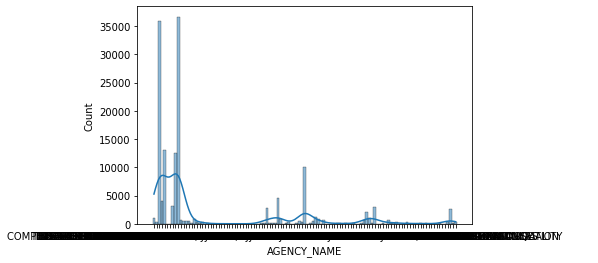

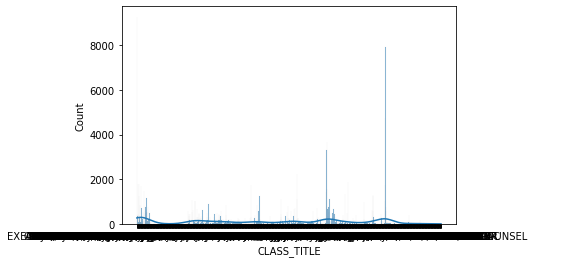

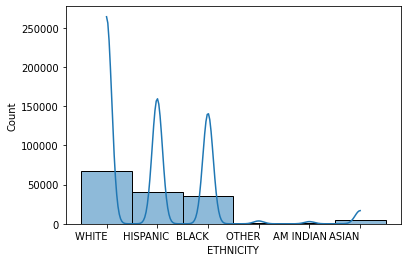

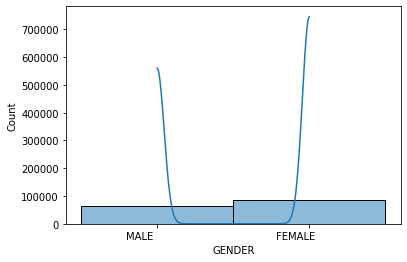

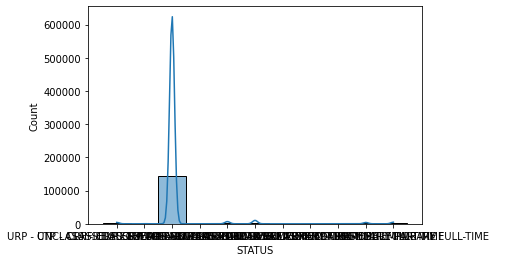

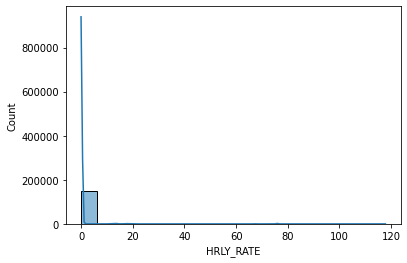

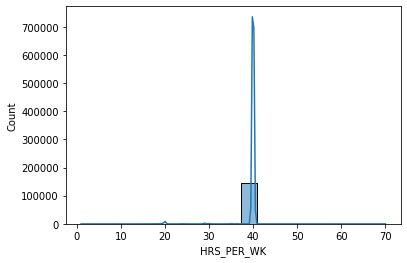

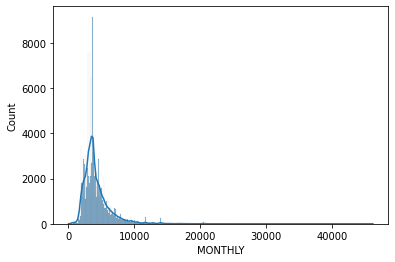

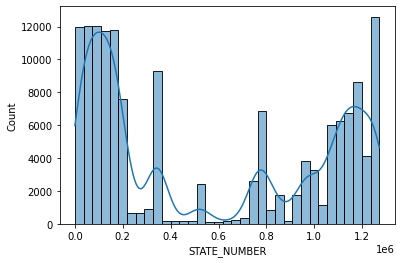

In [25]:
for columns in new_data:
  sns.histplot(x=columns, data=new_data,kde=True)
  plt.show()

1. There is no much variations in **AGENCY_NAME AND CLASS_TITLE**(no proper distribution).

2. More employees belongs to **WHITE** people.

3. More employees are **FEMALE** individuals.

4. **Status** and **HRS_PER_WEEK** is having normal distribution.

5. **HRLY_RATE** and **MONTHLY** is having left skewed distribution.

6. The majority of an employee is less than **10000** dollars per month.

7. The majority of employees works in **CLASSIFIED_REGULAR_FULL_TIME**.

8. The majority of employee working in **HEALTH AND HUMAN SERVICES COMMISSION** that is about **36667** and **TEXAS DEPARTMENT OF CRIMINAL JUSTICE** is being in second place having **35926**.

9. The majority no. of employees earn on a range of **0-8** dollars per hour.

10. The majority no.of employees work on an avearge of **40** hours per week.

## BIVARIATE ANALYSIS

### It refers to plots between input variables and target variable.

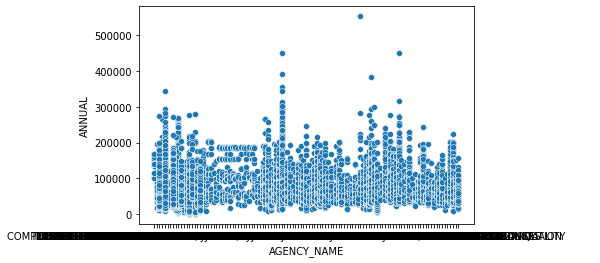

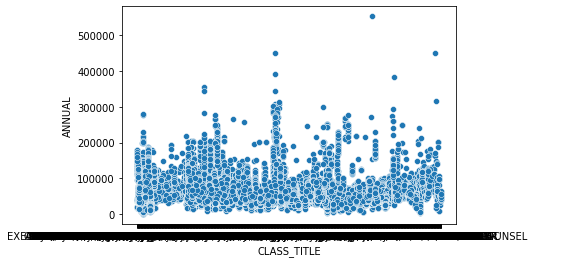

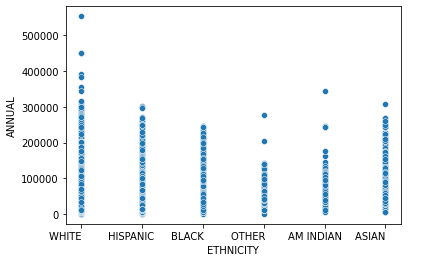

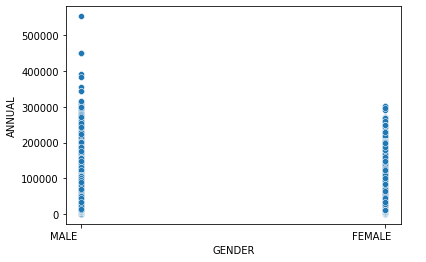

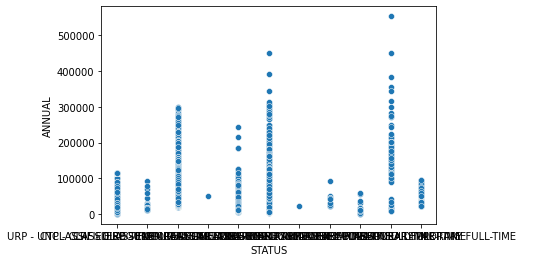

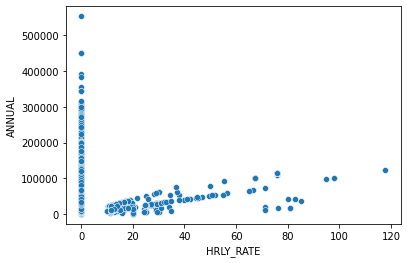

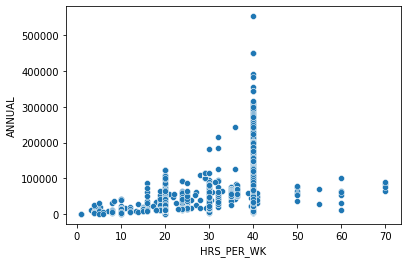

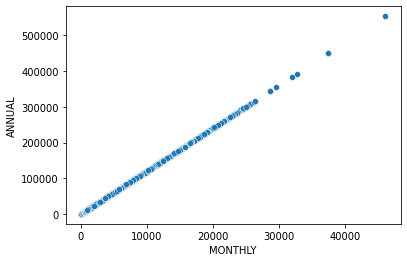

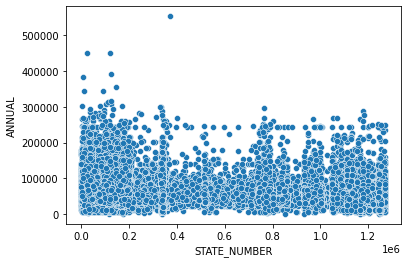

In [26]:
for columns in new_data:
  sns.scatterplot(x=columns,y=data.ANNUAL,data=new_data)
  plt.show()

In [27]:
data.loc[data['ANNUAL'] == 553500]

AGENCY                                        AGENCY_NAME  \
83851     542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   

                            LAST NAME                      FIRST NAME MI  \
83851  WILLSON                         JAMES                               

      CLASS_CODE                                        CLASS_TITLE  \
83851   C542      CHIEF SCIENTIFIC OFFICER                      ...   

             ETHNICITY           GENDER  \
83851  WHITE            MALE              

                                         STATUS EMPLOY_DATE  HRLY_RATE  \
83851  ERF - EXEMPT REGULAR FULL-TIME              03/01/16        0.0   

       HRS_PER_WK  MONTHLY    ANNUAL  STATE_NUMBER duplicated  \
83851        40.0  46125.0  553500.0        372291        NaN   

       multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
83851                      NaN                    NaN                   NaN   

      hide_from_search  
83851              NaN

In [28]:
data.loc[data['ANNUAL'] > 400000]

AGENCY                                        AGENCY_NAME  \
14793      323  TEACHER RETIREMENT SYSTEM                     ...   
83851      542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   
144232     327  EMPLOYEES RETIREMENT SYSTEM                   ...   

                             LAST NAME                      FIRST NAME MI  \
14793   AUBY                            JASE                            R   
83851   WILLSON                         JAMES                               
144232  TULL                            CHARLES                         T   

       CLASS_CODE                                        CLASS_TITLE  \
14793    C204      CHIEF INVESTMENT OFFICER                      ...   
83851    C542      CHIEF SCIENTIFIC OFFICER                      ...   
144232   D136      DIRECTOR OF INVESTMENTS                       ...   

              ETHNICITY           GENDER  \
14793   WHITE            MALE              
83851   WHITE            MALE              
144232  WHITE            MALE              

                                          STATUS EMPLOY_DATE  HRLY_RATE  \
14793   ERF - EXEMPT REGULAR FULL-TIME              11/09/09        0.0   
83851   ERF - EXEMPT REGULAR FULL-TIME              03/01/16        0.0   
144232  URF - UNCLASSIFIED REGULAR FULL-TIME        02/01/09        0.0   

        HRS_PER_WK  MONTHLY    ANNUAL  STATE_NUMBER duplicated  \
14793         40.0  37500.0  450000.0        121522        NaN   
83851         40.0  46125.0  553500.0        372291        NaN   
144232        40.0  37500.0  450000.0         24680        NaN   

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
14793                       NaN                    NaN                   NaN   
83851                       NaN                    NaN                   NaN   
144232                      NaN                    NaN                   NaN   

       hide_from_search  
14793               NaN  
83851               NaN  
144232              NaN

1. There is no trend between **AGENCY_NAME** and **ANNUAL**.

2. There is no trend between **CLASS_TITLE** and **ANNUAL**.

3. The Agencies are paying less than **200000$** to their majority of employees per year.

4. The Chief Scientific Officer is getting highest salary that is about **553500$** per Annum.

5. In Class_title majority of designation individual getting less then **200000$**.

6. Excluding **WHITE** peoples others are getting less than **300000$** per annum.

7. The highest salary paid to **WHITE** people is about **500000$** per annum.

8. Male individuals are getting **more salary** compared to Female individuals.

9. The maximum salaries are earned by **UNCLASSIFIED REGULAR FULL-TIME** and **EXEMPT REGULAR FULL-TIME**.

10. The people who are working **30-40 HRS_PER_WEEK** are getting higher salaries compared to others.

11. HRLY_RATE and MONTHLY is having **linear trend** with annual.

12. The females are getting paid less than **3lakh dollars**.

13. Only one employee of STATE_NUMBER(372291) has salary of above **5lakh dollars** and majority of them have salary less tham 3lakh dollars annually.

In [29]:
data

AGENCY                                        AGENCY_NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS_CODE                                        CLASS_TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY_DATE  HRLY_RATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   
...                                          ...         ...        ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17    0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15    0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89    0.00000   
149480  CRP - CLASSIFIED REGULAR PA

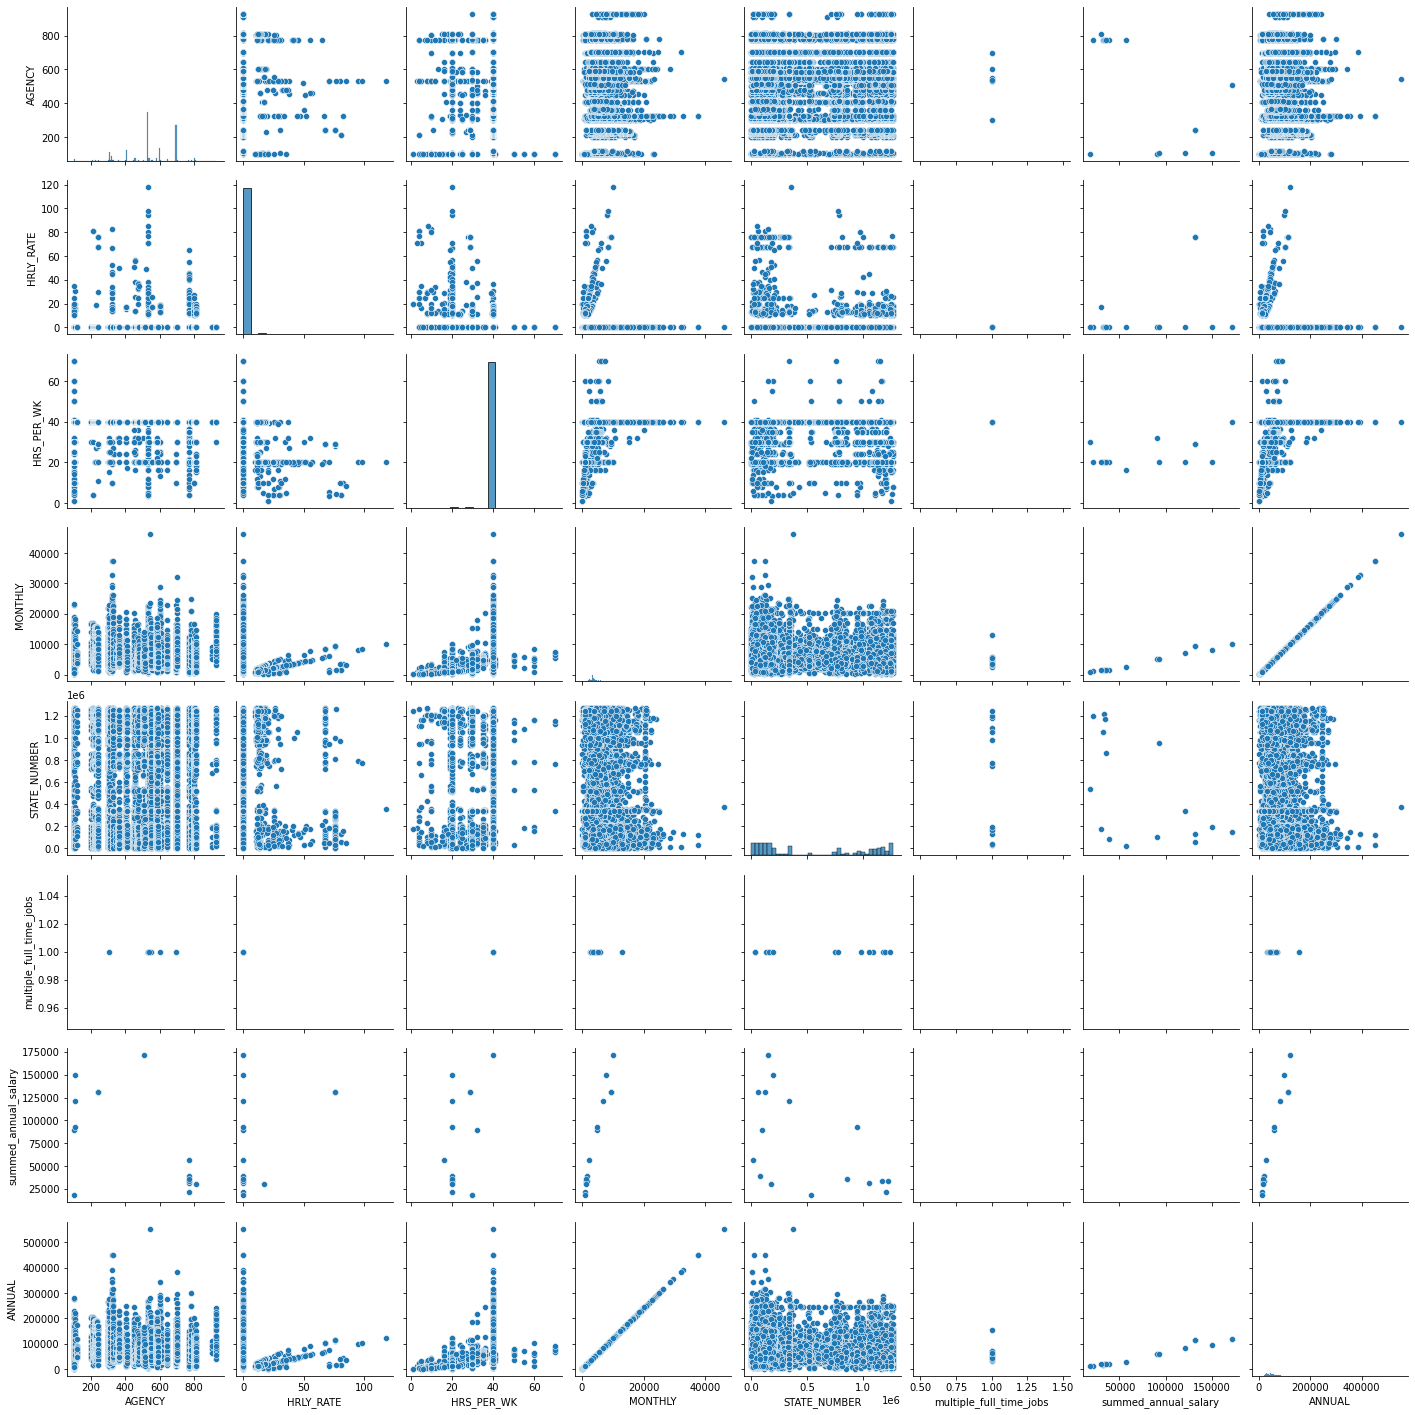

In [30]:
sns.pairplot(data=data[['AGENCY','HRLY_RATE','HRS_PER_WK','MONTHLY','STATE_NUMBER','multiple_full_time_jobs','summed_annual_salary','ANNUAL']])
plt.show()

## MULTIVARIATE ANALYSIS

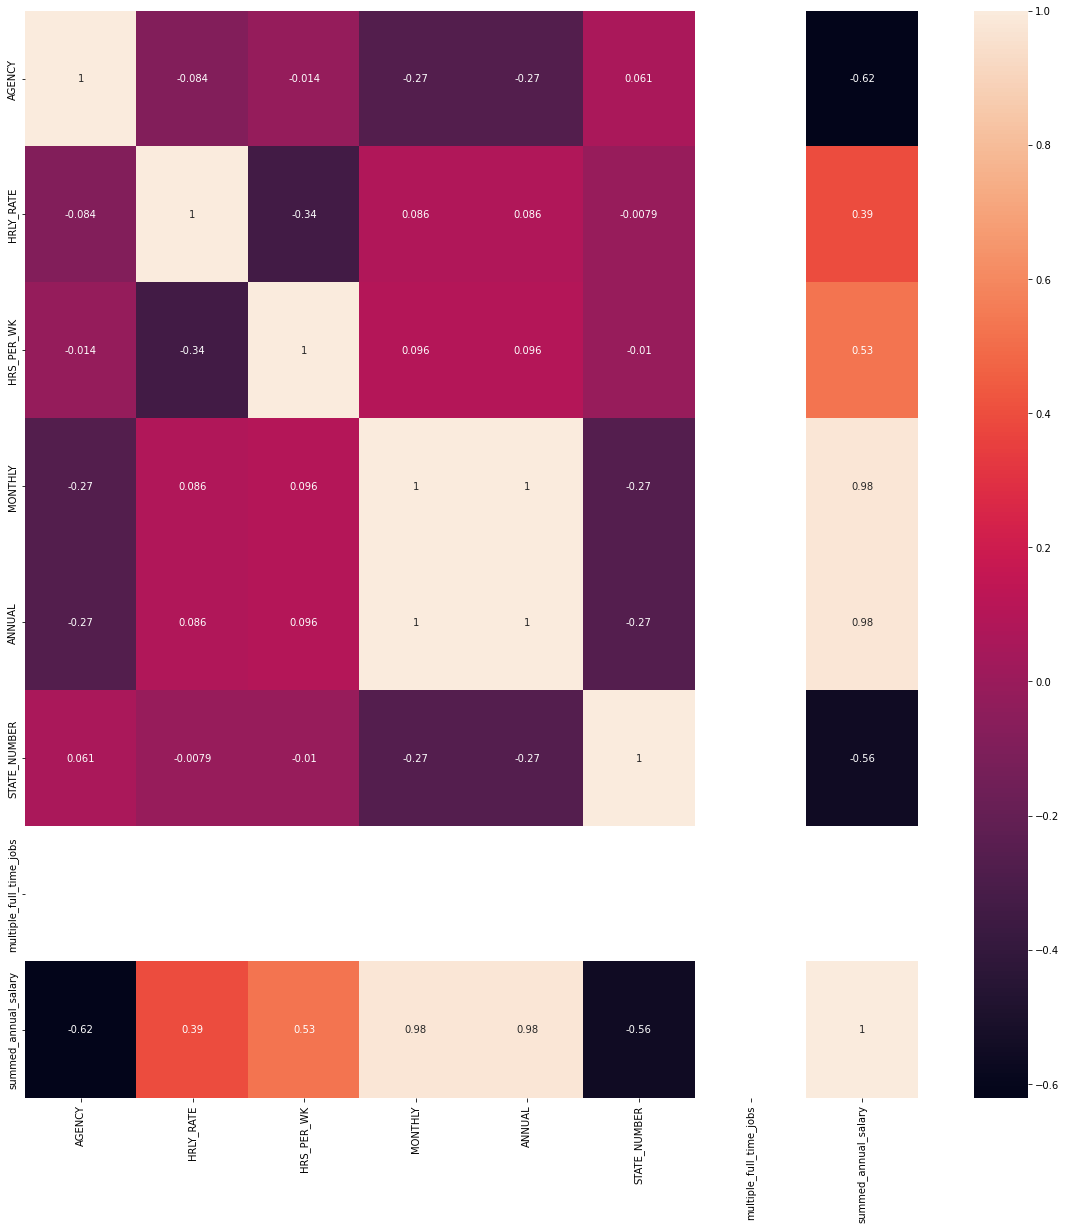

In [31]:
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(data=data.corr(),annot=True)
plt.show()

1. Monthly is having **0.98 **correlation with summed_annual_salary, so both columns are highly co related with each other.

2. Multiple_full_time_jobs is **highly correlated** with every other feature.

3. **MONTHLY** and **ANNUAL** columns are highly correlated with each other i.e, 100%
so we are dropping **MONTHLY** columns.

## Data Preprocessing and Feature Engineering

Handling missing values

In [32]:
data.isnull().sum()

AGENCY                          0
AGENCY_NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS_CODE                      0
CLASS_TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY_DATE                     0
HRLY_RATE                       0
HRS_PER_WK                      0
MONTHLY                         0
ANNUAL                          0
STATE_NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

1. As, last five columns have more than **95% of them are null values**,we will ignore them.

2. For particular **AGENCY** code there is unique **AGENCY_NAME** so, we are dropping **AGENCY**.

3. We are droping **LAST NAME**,**FIRST NAME**,**MI** since there is no relation with target variable.

4. For particular **CLASS_TITLE** there is unique **CLASS_CODE** so, we are dropping **CLASS_CODE**.

In [33]:
data.columns

Index(['AGENCY', 'AGENCY_NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS_CODE',
       'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY_DATE',
       'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'STATE_NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [34]:
data=data.drop(['AGENCY','LAST NAME','FIRST NAME','MI','CLASS_CODE','duplicated','MONTHLY','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1)

In [35]:
data

AGENCY_NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS_TITLE        ETHNICITY  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 GENDER                                    STATUS EMPLOY_DATE  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20   
...                 ...                                       ...         ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME          02/16/12   

        HRLY_RATE  HRS_PER_WK     ANNUAL  STATE_NUMBER  
0        75.96150        29.0  114549.84        127717  
1        81.04454         4.0   16857.24        127717  
2        75.96150        29.0  114549.84         59115  
3        81.04453         4.0   16857.24         59115  
4         0.00000        40.0   39411.24        165030  
...           ...         ...        ...           ...  
149476    0.00000        40.0   34788.00        770781  
149477    0.00000        40.0   66000.00        847431  
149478   12.93000        20.0   13447.20         34266  
149479    0.00000        40.0   68929.92        123490  
149480   11.74000        20.0   12209.52        103583  

[149481 rows x 10 columns]

### HANDLING EMPLOY_DATE COLUMN

In [36]:
#  Converting object dtype date to datetime dtype
from datetime import datetime as dt
data['EMPLOY_DATE'] = pd.to_datetime(data['EMPLOY_DATE'])
# add a column for Year
data['Year'] = data['EMPLOY_DATE'].dt.year

In [37]:
data

AGENCY_NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS_TITLE        ETHNICITY  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 GENDER                                    STATUS EMPLOY_DATE  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      1988-02-18   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2015-02-01   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      2020-02-01   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2018-09-01   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2020-06-29   
...                 ...                                       ...         ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2017-10-30   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2015-07-13   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME        2012-10-15   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1989-09-22   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME        2012-02-16   

        HRLY_RATE  HRS_PER_WK     ANNUAL  STATE_NUMBER  Year  
0        75.96150        29.0  114549.84        127717  1988  
1        81.04454         4.0   16857.24        127717  2015  
2        75.96150        29.0  114549.84         59115  2020  
3        81.04453         4.0   16857.24         59115  2018  
4         0.00000        40.0   39411.24        165030  2020  
...           ...         ...        ...           ...   ...  
149476    0.00000        40.0   34788.00        770781  2017  
149477    0.00000        40.0   66000.00        847431  2015  
149478   12.93000        20.0   13447.20         34266  2012  
149479    0.00000        40.0   68929.92        123490  1989  
149480   11.74000        20.0   12209.52        103583  2012  

[149481 rows x 11 columns]

In [38]:
# Fetching today's date and removing time stamp(converting time to zeros)
import datetime as dt
data['cur_yr']=dt.datetime.combine(dt.date.today(), dt.datetime.min.time())

In [39]:
data

AGENCY_NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS_TITLE        ETHNICITY  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 GENDER                                    STATUS EMPLOY_DATE  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      1988-02-18   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2015-02-01   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      2020-02-01   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2018-09-01   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2020-06-29   
...                 ...                                       ...         ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2017-10-30   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2015-07-13   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME        2012-10-15   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1989-09-22   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME        2012-02-16   

        HRLY_RATE  HRS_PER_WK     ANNUAL  STATE_NUMBER  Year     cur_yr  
0        75.96150        29.0  114549.84        127717  1988 2023-01-13  
1        81.04454         4.0   16857.24        127717  2015 2023-01-13  
2        75.96150        29.0  114549.84         59115  2020 2023-01-13  
3        81.04453         4.0   16857.24         59115  2018 2023-01-13  
4         0.00000        40.0   39411.24        165030  2020 2023-01-13  
...           ...         ...        ...           ...   ...        ...  
149476    0.00000        40.0   34788.00        770781  2017 2023-01-13  
149477    0.00000        40.0   66000.00        847431  2015 2023-01-13  
149478   12.93000        20.0   13447.20         34266  2012 2023-01-13  
149479    0.00000        40.0   68929.92        123490  1989 2023-01-13  
149480   11.74000        20.0   12209.52        103583  2012 2023-01-13  

[149481 rows x 12 columns]

#### We are subtracting Current year with EMPLOY_DATE and applying it to lambda function to calculate years for each record.

In [40]:
data['yrs']=((data.cur_yr)-(data.EMPLOY_DATE)).apply(lambda x: str(x).split(' ')[0]).apply(lambda x: int(x)/365)

In [41]:
data

AGENCY_NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS_TITLE        ETHNICITY  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 GENDER                                    STATUS EMPLOY_DATE  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      1988-02-18   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2015-02-01   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      2020-02-01   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2018-09-01   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2020-06-29   
...                 ...                                       ...         ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2017-10-30   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2015-07-13   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME        2012-10-15   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1989-09-22   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME        2012-02-16   

        HRLY_RATE  HRS_PER_WK     ANNUAL  STATE_NUMBER  Year     cur_yr  \
0        75.96150        29.0  114549.84        127717  1988 2023-01-13   
1        81.04454         4.0   16857.24        127717  2015 2023-01-13   
2        75.96150        29.0  114549.84         59115  2020 2023-01-13   
3        81.04453         4.0   16857.24         59115  2018 2023-01-13   
4         0.00000        40.0   39411.24        165030  2020 2023-01-13   
...           ...         ...        ...           ...   ...        ...   
149476    0.00000        40.0   34788.00        770781  2017 2023-01-13   
149477    0.00000        40.0   66000.00        847431  2015 2023-01-13   
149478   12.93000        20.0   13447.20         34266  2012 2023-01-13   
149479    0.00000        40.0   68929.92        123490  1989 2023-01-13   
149480   11.74000        20.0   12209.52        103583  2012 2023-01-13   

              yrs  
0       34.926027  
1        7.953425  
2        2.950685  
3        4.369863  
4        2.542466  
...           ...  
149476   5.208219  
149477   7.509589  
149478  10.252055  
149479  33.331507  
149480  10.915068  

[149481 rows x 13 columns]

In [42]:
data.yrs.max()

50.04383561643836

In [43]:
data.yrs.min()

-49.583561643835615

In [44]:
neg= data.loc[data['yrs']<0]
neg

AGENCY_NAME  \
20904   DEPARTMENT OF PUBLIC SAFETY                   ...   
88771   TEXAS DEPARTMENT OF TRANSPORTATION            ...   
116978  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
141891  HOUSE OF REPRESENTATIVES                      ...   
148921  SOIL AND WATER CONSERVATION BOARD             ...   

                                              CLASS_TITLE        ETHNICITY  \
20904   SERGEANT, DPS                                 ...  WHITE             
88771   ADMINISTRATIVE ASST II                        ...  WHITE             
116978  AGRICULTURE SPEC V                            ...  WHITE             
141891  ELECTED OFFICIAL                              ...  WHITE             
148921  PROGRAM SPECIALIST VII                        ...  WHITE             

                 GENDER                                    STATUS EMPLOY_DATE  \
20904   MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2071-10-06   
88771   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2072-08-01   
116978  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2069-07-14   
141891  MALE             URF - UNCLASSIFIED REGULAR FULL-TIME      2069-01-14   
148921  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2068-12-01   

        HRLY_RATE  HRS_PER_WK    ANNUAL  STATE_NUMBER  Year     cur_yr  \
20904         0.0        40.0  86494.92        171968  2071 2023-01-13   
88771         0.0        40.0  40661.28        100209  2072 2023-01-13   
116978        0.0        40.0  48404.88         68427  2069 2023-01-13   
141891        0.0        40.0   7200.00        116511  2069 2023-01-13   
148921        0.0        40.0  91900.92         96871  2068 2023-01-13   

              yrs  
20904  -48.761644  
88771  -49.583562  
116978 -46.531507  
141891 -46.035616  
148921 -45.915068

In [45]:
# The joining date of employee is higher than the Current Date which leads to negative years of experience so, we are dropping those 5 records.
data.drop(neg.index,inplace=True)

In [46]:
data

AGENCY_NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS_TITLE        ETHNICITY  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 GENDER                                    STATUS EMPLOY_DATE  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      1988-02-18   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2015-02-01   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      2020-02-01   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2018-09-01   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2020-06-29   
...                 ...                                       ...         ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2017-10-30   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2015-07-13   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME        2012-10-15   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1989-09-22   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME        2012-02-16   

        HRLY_RATE  HRS_PER_WK     ANNUAL  STATE_NUMBER  Year     cur_yr  \
0        75.96150        29.0  114549.84        127717  1988 2023-01-13   
1        81.04454         4.0   16857.24        127717  2015 2023-01-13   
2        75.96150        29.0  114549.84         59115  2020 2023-01-13   
3        81.04453         4.0   16857.24         59115  2018 2023-01-13   
4         0.00000        40.0   39411.24        165030  2020 2023-01-13   
...           ...         ...        ...           ...   ...        ...   
149476    0.00000        40.0   34788.00        770781  2017 2023-01-13   
149477    0.00000        40.0   66000.00        847431  2015 2023-01-13   
149478   12.93000        20.0   13447.20         34266  2012 2023-01-13   
149479    0.00000        40.0   68929.92        123490  1989 2023-01-13   
149480   11.74000        20.0   12209.52        103583  2012 2023-01-13   

              yrs  
0       34.926027  
1        7.953425  
2        2.950685  
3        4.369863  
4        2.542466  
...           ...  
149476   5.208219  
149477   7.509589  
149478  10.252055  
149479  33.331507  
149480  10.915068  

[149476 rows x 13 columns]

In [47]:
data.shape

(149476, 13)

In [48]:
data.columns

Index(['AGENCY_NAME', 'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS',
       'EMPLOY_DATE', 'HRLY_RATE', 'HRS_PER_WK', 'ANNUAL', 'STATE_NUMBER',
       'Year', 'cur_yr', 'yrs'],
      dtype='object')

In [49]:
data.drop(['EMPLOY_DATE','Year','cur_yr'],inplace=True,axis=1)

In [50]:
data

AGENCY_NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS_TITLE        ETHNICITY  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 GENDER                                    STATUS  HRLY_RATE  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME       75.96150   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       81.04454   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME       75.96150   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       81.04453   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
...                 ...                                       ...        ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME         12.93000   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME         11.74000   

        HRS_PER_WK     ANNUAL  STATE_NUMBER        yrs  
0             29.0  114549.84        127717  34.926027  
1              4.0   16857.24        127717   7.953425  
2             29.0  114549.84         59115   2.950685  
3              4.0   16857.24         59115   4.369863  
4             40.0   39411.24        165030   2.542466  
...            ...        ...           ...        ...  
149476        40.0   34788.00        770781   5.208219  
149477        40.0   66000.00        847431   7.509589  
149478        20.0   13447.20         34266  10.252055  
149479        40.0   68929.92        123490  33.331507  
149480        20.0   12209.52        103583  10.915068  

[149476 rows x 10 columns]

## CATEGORICAL ENCODING - ONE HOT ENCODING

In [51]:
data=pd.get_dummies(data,drop_first= False)
data

HRLY_RATE  HRS_PER_WK     ANNUAL  STATE_NUMBER        yrs  \
0        75.96150        29.0  114549.84        127717  34.926027   
1        81.04454         4.0   16857.24        127717   7.953425   
2        75.96150        29.0  114549.84         59115   2.950685   
3        81.04453         4.0   16857.24         59115   4.369863   
4         0.00000        40.0   39411.24        165030   2.542466   
...           ...         ...        ...           ...        ...   
149476    0.00000        40.0   34788.00        770781   5.208219   
149477    0.00000        40.0   66000.00        847431   7.509589   
149478   12.93000        20.0   13447.20         34266  10.252055   
149479    0.00000        40.0   68929.92        123490  33.331507   
149480   11.74000        20.0   12209.52        103583  10.915068   

        AGENCY_NAME_ALCOHOLIC BEVERAGE COMMISSION                       \
0                                                       0                
1                                                       0                
2                                                       0                
3                                                       0                
4                                                       0                
...                                                   ...                
149476                                                  0                
149477                                                  0                
149478                                                  0                
149479                                                  0                
149480                                                  0                

        AGENCY_NAME_BOARD OF ARCHITECTURAL EXAMINERS                    \
0                                                       0                
1                                                       0                
2                                                       0                
3                                                       0                
4                                                       0                
...                                                   ...                
149476                                                  0                
149477                                                  0                
149478                                                  0                
149479                                                  0                
149480                                                  0                

        AGENCY_NAME_BOARD OF CHIROPRACTIC EXAMINERS                     \
0                                                       0                
1                                                       0                
2                                                       0                
3                                                       0                
4                                                       0                
...                                                   ...                
149476                                                  0                
149477                                                  0                
149478                                                  0                
149479                                                  0                
149480                                                  0                

        AGENCY_NAME_BOARD OF DENTAL EXAMINERS                           \
0                                                       0                
1                                                       0                
2                                                       0                
3                                                       0                
4                                                       0                
...                                                   ...           

In [52]:
data.shape

(149476, 1559)

## Scaling

Scaling the data is not required for the given dataset because we have only limited or very less variations in the feature columns.

## Model Creation

In [53]:
X= data.drop(['ANNUAL'],axis=1)
y=data.ANNUAL

In [54]:
X

HRLY_RATE  HRS_PER_WK  STATE_NUMBER        yrs  \
0        75.96150        29.0        127717  34.926027   
1        81.04454         4.0        127717   7.953425   
2        75.96150        29.0         59115   2.950685   
3        81.04453         4.0         59115   4.369863   
4         0.00000        40.0        165030   2.542466   
...           ...         ...           ...        ...   
149476    0.00000        40.0        770781   5.208219   
149477    0.00000        40.0        847431   7.509589   
149478   12.93000        20.0         34266  10.252055   
149479    0.00000        40.0        123490  33.331507   
149480   11.74000        20.0        103583  10.915068   

        AGENCY_NAME_ALCOHOLIC BEVERAGE COMMISSION                       \
0                                                       0                
1                                                       0                
2                                                       0                
3                                                       0                
4                                                       0                
...                                                   ...                
149476                                                  0                
149477                                                  0                
149478                                                  0                
149479                                                  0                
149480                                                  0                

        AGENCY_NAME_BOARD OF ARCHITECTURAL EXAMINERS                    \
0                                                       0                
1                                                       0                
2                                                       0                
3                                                       0                
4                                                       0                
...                                                   ...                
149476                                                  0                
149477                                                  0                
149478                                                  0                
149479                                                  0                
149480                                                  0                

        AGENCY_NAME_BOARD OF CHIROPRACTIC EXAMINERS                     \
0                                                       0                
1                                                       0                
2                                                       0                
3                                                       0                
4                                                       0                
...                                                   ...                
149476                                                  0                
149477                                                  0                
149478                                                  0                
149479                                                  0                
149480                                                  0                

        AGENCY_NAME_BOARD OF DENTAL EXAMINERS                           \
0                                                       0                
1                                                       0                
2                                                       0                
3                                                       0                
4                                                       0                
...                                                   ...                
149476                                                  0                
149477                                              

In [55]:
X.shape

(149476, 1558)

In [56]:
y.shape

(149476,)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33)

In [58]:
X_train

HRLY_RATE  HRS_PER_WK  STATE_NUMBER       yrs  \
53723         0.0        40.0       1056285  4.789041   
105501        0.0        40.0       1265828  2.635616   
141180        0.0        40.0        170113  9.542466   
67900         0.0        40.0         97517  2.884932   
51528         0.0        40.0        124735  5.369863   
...           ...         ...           ...       ...   
34878         0.0        40.0        107878  5.369863   
147562        0.0        40.0        789663  7.624658   
75972         0.0        40.0        158839  9.158904   
131653        0.0        40.0        179717  6.665753   
104154        0.0        40.0        848926  7.452055   

        AGENCY_NAME_ALCOHOLIC BEVERAGE COMMISSION                       \
53723                                                   0                
105501                                                  0                
141180                                                  0                
67900                                                   0                
51528                                                   0                
...                                                   ...                
34878                                                   0                
147562                                                  0                
75972                                                   0                
131653                                                  0                
104154                                                  0                

        AGENCY_NAME_BOARD OF ARCHITECTURAL EXAMINERS                    \
53723                                                   0                
105501                                                  0                
141180                                                  0                
67900                                                   0                
51528                                                   0                
...                                                   ...                
34878                                                   0                
147562                                                  0                
75972                                                   0                
131653                                                  0                
104154                                                  0                

        AGENCY_NAME_BOARD OF CHIROPRACTIC EXAMINERS                     \
53723                                                   0                
105501                                                  0                
141180                                                  0                
67900                                                   0                
51528                                                   0                
...                                                   ...                
34878                                                   0                
147562                                                  0                
75972                                                   0                
131653                                                  0                
104154                                                  0                

        AGENCY_NAME_BOARD OF DENTAL EXAMINERS                           \
53723                                                   0                
105501                                                  0                
141180                                                  0                
67900                                                   0                
51528                                                   0                
...                                                   ...                
34878                                                   0                
147562                                                  0       

## Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_train) #y_predict is the model predicted output

In [60]:
y_train # Actual output values

53723      34050.24
105501     39411.24
141180     59232.00
67900     171880.92
51528      27754.08
            ...    
34878      22689.84
147562     48277.92
75972      42370.80
131653     46347.00
104154     44331.60
Name: ANNUAL, Length: 112107, dtype: float64

In [61]:
y_predict # Values predicted by model

array([38154.51071055, 39926.87385909, 58785.99783717, ...,
       42470.23754148, 45975.13612937, 43369.42136381])

In [62]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_train,y_predict)

In [63]:
r2score

0.9495749002913773

In [64]:
X_test.shape

(37369, 1558)

In [65]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.94)*(37369-1)/(37369-1558-1)
adjusted_r2

0.9373895559899469

## Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [67]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_test,predictions)

In [68]:
r2score

0.8361140068809871

In [69]:
X_test.shape

(37369, 1558)

In [70]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.836)*(37369-1)/(37369-1558-1)
adjusted_r2

0.8288647863725216

## Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [72]:
predictions = model.predict(X_test)

In [73]:
y_predict=regressor.predict(X_test)

In [74]:
r2score=r2_score(y_test,y_predict)

In [75]:
r2score

0.8754129304287834

In [76]:
adjusted_r2 = 1-(1-0.875)*(37369-1)/(37369-1558-1)
adjusted_r2

0.8695615749790562

### For different n_estimators we got below r2score and adjusted_r2

1. n_estimators = 10, r2score = 0.87, adjusted_r2 = 0.86

2. n_estimators = 50, r2score = 0.884, adjusted_r2 = 0.878

3. n_estimators = 100, r2score = 0.885, adjusted_r2 = 0.879

So from the above data there is no much variation in r2score and adjusted_r2 for respective n_estimators, So we are considering n_estimators = 10, for training Random Forest Regressor model.



## KNN Regressor

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

error_rate = [] #create list to store rmse values for different k
for K in range(0,30):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    error_rate.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 31687.32942789864
RMSE value for k=  2 is: 27892.503913164644
RMSE value for k=  3 is: 26399.58242254397
RMSE value for k=  4 is: 25609.14191630495
RMSE value for k=  5 is: 25174.121555625752
RMSE value for k=  6 is: 24884.810225094596
RMSE value for k=  7 is: 24722.52150858014
RMSE value for k=  8 is: 24554.68602183733
RMSE value for k=  9 is: 24442.776397005113
RMSE value for k=  10 is: 24342.89016916269
RMSE value for k=  11 is: 24287.552740306386
RMSE value for k=  12 is: 24227.335482641287
RMSE value for k=  13 is: 24182.29392103347
RMSE value for k=  14 is: 24153.37503276014
RMSE value for k=  15 is: 24110.956566202898
RMSE value for k=  16 is: 24086.600740772305
RMSE value for k=  17 is: 24062.96524682443
RMSE value for k=  18 is: 24046.111566347612
RMSE value for k=  19 is: 24027.59718656611
RMSE value for k=  20 is: 24003.791924156267
RMSE value for k=  21 is: 23984.626795850243
RMSE value for k=  22 is: 23972.673209826466
RMSE value for k=  23 is: 239

Text(0, 0.5, 'Error Rate')

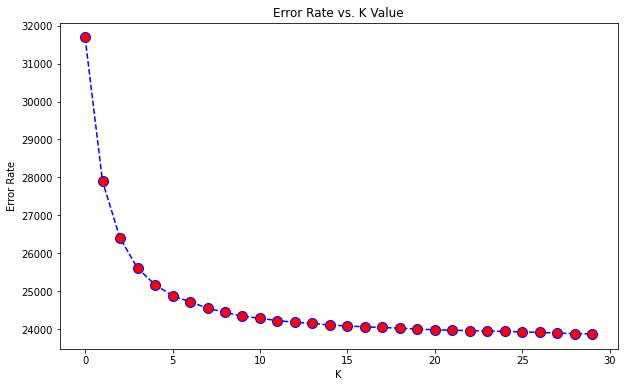

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(0,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above graph we are considering the number of neighbours = 8, because after 8 the error rate is almost in same range. 

In [80]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 15)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test)

In [81]:
r2score=r2_score(y_test,pred)

In [82]:
r2score

0.07481276282396987

In [83]:
adjusted_r2 = 1-(1-0.07)*(37369-1)/(37369-1558-1)
adjusted_r2

0.029538117844177703

## Conclusion

1. LINEAR REGRESSION

* r2score = 0.949

* adjusted_r2 = 0.937

2. DECISION TREE REGRESSOR

* r2score = 0.836

* adjusted_r2 = 0.828

3. RANDOM FOREST REGRESSOR

* r2score = 0.875

* adjusted_r2 = 0.869

4. KNN REGRESSOR

* r2score = 0.040

* adjusted_r2 = -0.0017

### By comparing various regression machine learning models,we found that Linear Regression model is best suited for Texas Salary Prediction Dataset, based on the above listed r2score and adjusted_r2 score for respective machine learning models.